In [3]:
import numpy as np
import pandas as pd

from rdkit.Chem import AllChem

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import manifold
from sklearn.manifold import TSNE
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# load the data

In [5]:
df = pd.read_csv('data/10980_pic50_VEGF2_CHEMBL279.csv')
df = df.drop_duplicates(subset='canonical_smiles')
df

,tid,cmpd_chembl_id,canonical_smiles,standard_type,value,confidence_score,cmpd_pref_name,activity_comment
0,10980,CHEMBL356626,CCCOCc1ccc2c(c1)c3c4CNC(=O)c4c5c(Cc6ccccc56)c3...,pIC50,7.890,8,NaN,NaN
1,10980,CHEMBL171558,COc1cc2c(Nc3cccc4occc34)ncnc2cc1OCCCN5CCOCC5,pIC50,6.600,8,NaN,NaN
2,10980,CHEMBL221053,CCc1cccc(NC(=O)Nc2ccc(cc2)c3cccc4[nH]nc(N)c34)c1,pIC50,8.220,9,NaN,NaN
3,10980,CHEMBL3754450,COc1cccc(c1)C(=O)CN2CCN(CC2)c3nnc(c4ccccc4)c5c...,pIC50,5.470,9,NaN,NaN
4,10980,CHEMBL383255,Cn1cnc(NCc2ccncc2)c1c3oc(Nc4ccc(OC(F)(F)F)cc4)nn3,pIC50,7.105,9,NaN,NaN
...,...,...,...,...,...,...,...,...
6710,10980,CHEMBL204621,Clc1ccc(Nc2oc(nn2)c3cccnc3CCc4ccncc4)cc1Cl,pIC50,6.565,9,NaN,NaN
6711,10980,CHEMBL4104034,CN1CCN(CC1)c2cccc(NC(=O)Nc3ccc(cc3)c4ccnc5[nH]...,pIC50,5.210,9,NaN,NaN
6712,10980,CHEMBL517956,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@H](CCc3cc(O)...,pIC50,5.360,9,ASTROGORGIADIOL,NaN
6713,10980,CHEMBL509635,COc1cc(cc(OC)c1OC)C2=C(CNC2=O)c3cn(CC4COC(C)(C...,pIC50,5.100,9,NaN,NaN


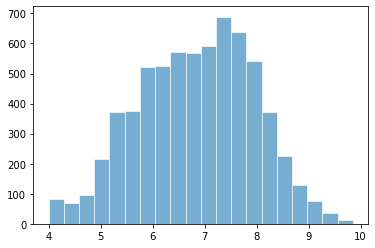

In [6]:
plot = df.value.hist(bins=20, grid=False, alpha=.6, edgecolor='white')

In [7]:
# binning the values

In [8]:
df['categories'] = pd.cut(df.value, bins=3, labels=range(3))

In [9]:
mols = [AllChem.MolFromSmiles(m) for m in df.canonical_smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]

In [ ]:
# Dimension reduction

In [ ]:
![manifold](https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_001.png)
# https://scikit-learn.org/stable/modules/manifold.html

In [10]:
# shape of the data, originaly smiles
data = np.array(fps)
data.shape, data[0][:10]

((6715, 1024), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [11]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(data[0])
sparsity = 1.0 - np.count_nonzero(data[0]) / data[0].size
print(sparsity)
print(csr_data)

0.935546875
  (0, 13)	1
  (0, 16)	1
  (0, 33)	1
  (0, 45)	1
  (0, 64)	1
  (0, 80)	1
  (0, 90)	1
  (0, 101)	1
  (0, 106)	1
  (0, 108)	1
  (0, 113)	1
  (0, 121)	1
  (0, 175)	1
  (0, 193)	1
  (0, 196)	1
  (0, 212)	1
  (0, 215)	1
  (0, 222)	1
  (0, 264)	1
  (0, 267)	1
  (0, 294)	1
  (0, 310)	1
  (0, 314)	1
  (0, 322)	1
  (0, 333)	1
  :	:
  (0, 650)	1
  (0, 652)	1
  (0, 684)	1
  (0, 695)	1
  (0, 723)	1
  (0, 726)	1
  (0, 730)	1
  (0, 745)	1
  (0, 794)	1
  (0, 802)	1
  (0, 807)	1
  (0, 842)	1
  (0, 849)	1
  (0, 870)	1
  (0, 875)	1
  (0, 887)	1
  (0, 895)	1
  (0, 926)	1
  (0, 932)	1
  (0, 935)	1
  (0, 957)	1
  (0, 960)	1
  (0, 968)	1
  (0, 984)	1
  (0, 997)	1


In [12]:
# PCA
# https://cs.wikipedia.org/wiki/Analýza_hlavních_komponent

In [13]:
pca = PCA(0.9)
pca.fit(fps)
fps_pca = pca.transform(fps)

shape:  (6715, 312)


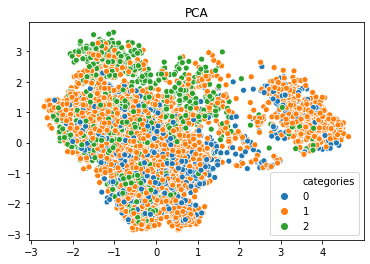

In [14]:
plot = sns.scatterplot(x=fps_pca[:,0], y=fps_pca[:,1], hue=df['categories']).set_title('PCA')
print('shape: ', fps_pca.shape)

In [15]:
# t-SNE
# https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [16]:
fps_tsne = TSNE(n_components=2, perplexity=50).fit_transform(fps_pca)

shape:  (6715, 2)


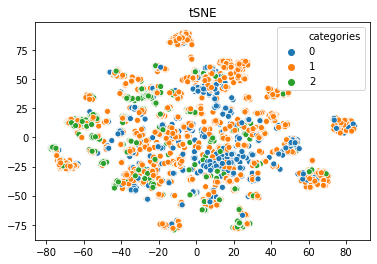

In [17]:
plot = sns.scatterplot(x=fps_tsne[:,0], y=fps_tsne[:,1], hue=df['categories']).set_title('tSNE')
print('shape: ', fps_tsne.shape)

In [18]:
# MDS
# https://en.wikipedia.org/wiki/Multidimensional_scaling

In [19]:
sparse_mat = distance.pdist(fps,metric="jaccard")
dist_mat = distance.squareform(sparse_mat)

clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")
fps_mds = clf.fit_transform(dist_mat)

shape:  (6715, 2)


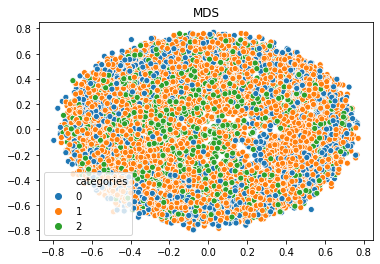

In [20]:
plot = sns.scatterplot(x=fps_mds[:,0], y=fps_mds[:,1], hue=df['categories']).set_title('MDS')
print('shape: ', fps_mds.shape)

In [ ]:
# SVD

In [ ]:
svd = TruncatedSVD(500)
fps_svd = svd.fit_transform(fps)

In [ ]:
plot = sns.scatterplot(x=fps_svd[:,0], y=fps_svd[:,1], hue=df['categories']).set_title('SVD')
print('shape: ', fps_svd.shape)